# Lab13: Stock price prediction
### Réalisé par: AIT WAARAB IMAD  imadaitwaarab@gmail.com
### EMSI 2024/2025


# T.A.F
1. Démarrer 
2. Analyser
3. Améliorer

In [1]:
pip cache purge

Files removed: 70
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install tensorflow


  Using cached tensorflow_intel-2.18.0-cp312-cp312-win_amd64.whl.metadata (4.9 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.12.23-py2.py3-none-any.whl.metadata (876 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached grpcio-1.69.0-cp312-cp312-win_amd64.whl.metadata (4.0 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.8.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached ml_dtypes-0.4.1-cp312-cp312-win_amd64.whl.metadata (20 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
  Using cached optr

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\imad\anaconda3\Lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\imad\anaconda3\Lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\imad\anaconda3\Lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\imad\anaconda3\Lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 98, in read
    data: bytes = self.__fp.read(amt)
                  ^^^^^^^^^^^^^^^^^^^
  File "C:\Users\imad\anaconda3\Lib\http\client.py", line 479, in read
    s = self.fp.read(amt)
        ^^^^^^^^^^^^^^^^^
  File "C:\Users\imad\anaconda3\Lib\socket.py", line 720, in readinto
    return self._sock.recv_into(b)
           ^^^^^^^

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.layers import Dense

ModuleNotFoundError: No module named 'keras'

In [5]:
pip install --upgrade pip

   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/1.8 MB ? eta -:--:--
   ---------------------------------- ----- 1.6/1.8 MB 4.7 MB/s eta 0:00:01
   ---------------------------------------- 1.8/1.8 MB 4.8 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.2
    Uninstalling pip-24.2:
      Successfully uninstalled pip-24.2
Note: you may need to restart the kernel to use updated packages.


# Step 1: Dataset
 url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'

In [4]:
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'
dataset_train = pd.read_csv(url)
training_set = dataset_train.iloc[:, 1:2].values #open col and convert it to a NumPy array
print(dataset_train)
# Data transformation
sc = MinMaxScaler(feature_range=(0,1)) #vals between 0 and 1
training_set_scaled = sc.fit_transform(training_set) #Normalization(values between 0 and 1) x scaled=X-Xmin/Xmax-Xmin
print(training_set_scaled)
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0]) #...
    y_train.append(training_set_scaled[i, 0]) #...
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) #Reshape to 3d array(Number of samples, Number of time steps, ...)

            Date    Open    High     Low    Last   Close  \
0     2018-09-28  234.05  235.95  230.20  233.50  233.75   
1     2018-09-27  234.55  236.80  231.10  233.80  233.25   
2     2018-09-26  240.00  240.00  232.50  235.00  234.25   
3     2018-09-25  233.30  236.75  232.00  236.25  236.10   
4     2018-09-24  233.55  239.20  230.75  234.00  233.30   
...          ...     ...     ...     ...     ...     ...   
2030  2010-07-27  117.60  119.50  112.00  118.80  118.65   
2031  2010-07-26  120.10  121.00  117.10  117.10  117.60   
2032  2010-07-23  121.80  121.95  120.25  120.35  120.65   
2033  2010-07-22  120.30  122.00  120.25  120.75  120.90   
2034  2010-07-21  122.10  123.00  121.05  121.10  121.55   

      Total Trade Quantity  Turnover (Lacs)  
0                  3069914          7162.35  
1                  5082859         11859.95  
2                  2240909          5248.60  
3                  2349368          5503.90  
4                  3423509          7999.55  
...

# Step 2: Model

In [6]:
# Initialize the RNN model
model = Sequential()

# Add the first SimpleRNN layer with return_sequences=True
model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Add the second SimpleRNN layer with return_sequences=True
model.add(SimpleRNN(units=50, return_sequences=True))
model.add(Dropout(0.2))

# Add the third SimpleRNN layer with return_sequences=True
model.add(SimpleRNN(units=50, return_sequences=True))
model.add(Dropout(0.2))

# Add the fourth SimpleRNN layer without return_sequences
model.add(SimpleRNN(units=50))
model.add(Dropout(0.2))

# Add the Dense output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

C:\Users\User1\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# Step 3: train

In [8]:
model.fit(X_train,y_train,epochs=30,batch_size=32)

Epoch 1/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - loss: 0.3155
Epoch 2/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.1218
Epoch 3/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0776
Epoch 4/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0499
Epoch 5/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0362
Epoch 6/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0271
Epoch 7/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0207
Epoch 8/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0170
Epoch 9/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0133
Epoch 10/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0103
Epoch 11/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0084
Epoch 12/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0066
Epoch 13/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0062
Epoch 14/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0057
Epoch 15/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0056
Epo

# Step 4: test
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/tatatest.csv'

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 867ms/step


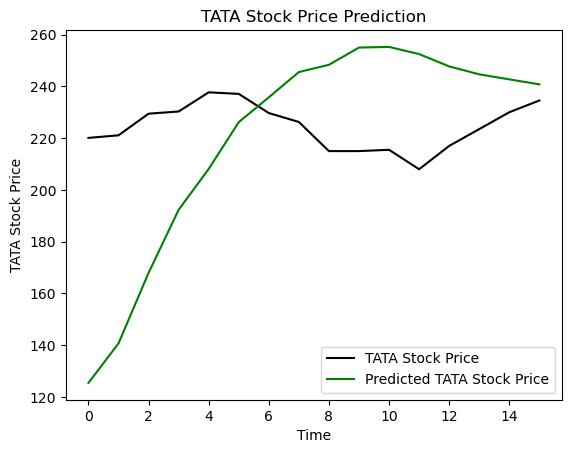

In [17]:
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/tatatest.csv'
dataset_test = pd.read_csv(url)
real_stock_price = dataset_test.iloc[:, 1:2].values
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Prediction
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
plt.plot(real_stock_price, color = 'black', label = 'TATA Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()
print()

#  save the model

In [11]:
#model.save('tata_model.h5')